# 1.) Importieren der Pakete und einlesen des Datensatzes 

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [186]:
file = 'COVID-19.csv'
data = pd.read_csv(file, sep=';', na_values='Nothing')

# 2.) Preprocessing

##  2.1) Sichtung der CSV-Datei

In [187]:
print(data.head())

      dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0  13.05.2020   13      5  2020    280       5             Afghanistan    AF   
1  12.05.2020   12      5  2020    285       2             Afghanistan    AF   
2  11.05.2020   11      5  2020    369       5             Afghanistan    AF   
3  10.05.2020   10      5  2020    255       6             Afghanistan    AF   
4  09.05.2020    9      5  2020    215       3             Afghanistan    AF   

  countryterritoryCode  popData2018 continentExp  
0                  AFG   37172386.0         Asia  
1                  AFG   37172386.0         Asia  
2                  AFG   37172386.0         Asia  
3                  AFG   37172386.0         Asia  
4                  AFG   37172386.0         Asia  


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16741 entries, 0 to 16740
Data columns (total 11 columns):
dateRep                    16741 non-null object
day                        16741 non-null int64
month                      16741 non-null int64
year                       16741 non-null int64
cases                      16741 non-null int64
deaths                     16741 non-null int64
countriesAndTerritories    16741 non-null object
geoId                      16681 non-null object
countryterritoryCode       16529 non-null object
popData2018                16540 non-null float64
continentExp               16741 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 1.1+ MB


Über verschiedene Befehle können Informationen des Datensatzes eingeholt werden. Im obigen Infobefehl fällt auf,
dass der Datensatz im hinteren Teil der Attribute weniger Einträge aufweist. Dies könnte auf missing values hinweisen.
Zudem sind nur die Datentypen Object, int, float vorhanden, obwohl auch ein Datumsformat eingelesen worden sein müsste.

In [189]:
datarelevant = ['cases','deaths','popData2018']
data[datarelevant].describe()

,cases,deaths,popData2018
count,16741.000000,16741.000000,1.654000e+04
mean,252.257750,17.413476,5.253378e+07
std,1654.897379,125.236691,1.780738e+08
min,-2461.000000,-6.000000,1.000000e+03
25%,0.000000,0.000000,2.448255e+06
50%,2.000000,0.000000,9.630959e+06
75%,36.000000,1.000000,3.705886e+07
max,48529.000000,4928.000000,1.392730e+09


In [190]:
data.shape

(16741, 11)

Durch die beiden obigen Befehle describe und shape kann eine erste Übersicht über die Ausprägung der Daten gewonnen
werden. Hier geht es vor allem um eine Gesamtansicht bzw. eine grobe Draufsicht. 
Dafür wurden nur die relevanten Attribute ausgewählt, da diese Ansicht bei Datumsformaten z.B. keinen Sinn macht.
Die Werte werden später noch genauer inspiziert. Zudem ist zu sehen, dass der Datensatz 16741 Einträge mit 11
Ausprägungen enthält.

In [191]:
data.dtypes

dateRep                     object
day                          int64
month                        int64
year                         int64
cases                        int64
deaths                       int64
countriesAndTerritories     object
geoId                       object
countryterritoryCode        object
popData2018                float64
continentExp                object
dtype: object

Wie bereits erwähnt, wird hier noch einmal bestätigt, dass das Datumsformat falsch eingelesen wurde.
Dies wird im Folgenden behoben.

## 2.2) Data Preperation

### 2.2.1) Korrektur falsch eingelesener Formate (Datumsformat)

In [192]:
data['dateRep'] = pd.to_datetime(data['dateRep'])


In [193]:
data['popData2018'] = data['popData2018']

In [194]:

NA = data[data['popData2018'] == None]
print(NA)

Empty DataFrame
Columns: [dateRep, day, month, year, cases, deaths, countriesAndTerritories, geoId, countryterritoryCode, popData2018, continentExp]
Index: []


In [197]:
data.dtypes

dateRep                    datetime64[ns]
day                                 int64
month                               int64
year                                int64
cases                               int64
deaths                              int64
countriesAndTerritories            object
geoId                              object
countryterritoryCode               object
popData2018                       float64
continentExp                       object
dtype: object

Nun ist zu sehen, dass die erste Spalte ihr korrektes Datumsformat besitzt. Im Folgenden kann man sich den Kopf
des Datensatzes nochmals ansehen

In [198]:
data.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-12-05,12,5,2020,285,2,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-11-05,11,5,2020,369,5,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-10-05,10,5,2020,255,6,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-09-05,9,5,2020,215,3,Afghanistan,AF,AFG,37172386.0,Asia


### 2.2.2) Null-Werte

Wie bereits zu Beginn vermutet, sind in den Attributen 'geoID','countriesAndTerritories','popData2018' missing values
enthalten. Dies wird anhand des folgenden Befehls geprüft.

In [199]:
print(data.isnull().sum())

dateRep                      0
day                          0
month                        0
year                         0
cases                        0
deaths                       0
countriesAndTerritories      0
geoId                       60
countryterritoryCode       212
popData2018                201
continentExp                 0
dtype: int64


Anschließend ist zu klären wie mit diesen Werten umgegangen werden soll. Hierbei bestehen verschiedene Möglichkeiten,
wie z.B. das Auffüllen anhand vorhandener Daten (Gleichen Wert kopieren, Mittelwerte, letzten Wert usw.) oder mit
einem "radikalen" Schritt die Daten zu löschen. Da es sich - abgesehen von den Bevölkerungsdaten - bei den fehlenden Werten vor allem um Abkürzungen und Kürzel handelt,
werden die Missing Values in diesem Fall unverändert belassen, da wichtige Werte wie Todesrate und Fallzahlen weiter
enthalten sind. Hierbei müsste Python im besten Fall noch gesagt werden wie mit diesen Werten umzugehen ist.

### 2.2.3) Korrelationsanalyse

In [200]:
correlation = data.corr()
correlation

,day,month,year,cases,deaths,popData2018
day,1.000000,-0.177092,-0.112038,-0.009823,-0.006532,-0.005263
month,-0.177092,1.000000,-0.406170,0.078179,0.074135,-0.088092
year,-0.112038,-0.406170,1.000000,0.009647,0.008814,-0.011740
cases,-0.009823,0.078179,0.009647,1.000000,0.845443,0.130466
deaths,-0.006532,0.074135,0.008814,0.845443,1.000000,0.094093
popData2018,-0.005263,-0.088092,-0.011740,0.130466,0.094093,1.000000


Zur Beurteilung der Aussagekraft der verschiedenen Attribute (Features) wird eine Korrelationsanalyse durchgeführt. Aufgrund der recht überschaubaren Anzahl an Dimensionen ist dies bei dem vorhandenen Datensatz nicht zwingend notwendig, da mit steigender Anzahl an Attributen auch die Chance steigt, dass zussamenhängende Attribute vorhanden sind, welche den Datensatz unnötigerweise komplex machen. Diese könnten dann z.B. mithilfe einer PCA zu "künstlichen" Attributen zusammengefasst werden, was allerdings auf komplexere Verfahren wie ...... abzielt.

Dennoch ist eine Korrelationsanalyse hier interessant, da wir sehen, dass erwartungsgemäß die Höhe der Fallzahl stark mit der Zahl der Todesfälle korrelliert. Dies scheint in gewisser Weise offensichtlich, kann aber beispielsweise helfen die Daten zu validieren. Sollte dieser Zusammenhang hier nicht bestehen, müssten wir uns die Frage stellen, woran das liegt und ob unsere Daten ggf. qualitativ hochwertig sind.
Ebenfalls interessant zu sehen ist, dass weder die Fälle der Erkrankten, noch die Zahl der Todesfälle mit der Bevökerungsanzahl der einzelnen Länder korreliert

Bei komplexeren Datensätzen können die Zusammenhangsmaße zudem mithilfe einer Heatmap visualisiert und somit leichter
ausfindig gemacht werden:

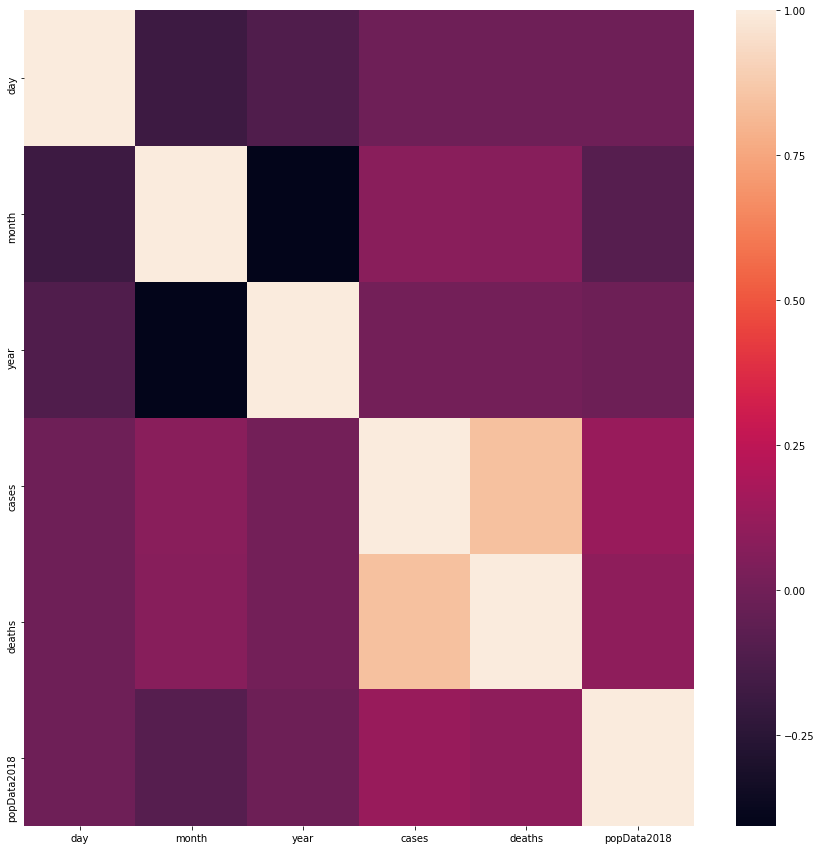

In [204]:
fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(correlation,
xticklabels=correlation.columns,
yticklabels=correlation.columns,
ax=ax)

# 3.) Analyse des Datensatzes

In der folgenden Analyse des Datensatzes wird nun zum einen eine Zeitpunktbetrachtung durchgeführt, die den aktuellen
Stand (hier 15.05.2020) der einzelnen Länder in der Covid-19-Krise wiedergibt (Um den Zeitpunkt auf einen aktuelleren
Tag zu updaten, einfach den aktuellen Datensatz herunterladen, einlesen und das heutige Datum ändern).

Zum Anderen findet nachfolgend eine Zeitreihenanalyse statt, die die Entwicklung einzelner Gebiete darstellt.

## 3.1) Zeitpunktbetrachtung

Der Filterung des Datensatzes zur Zeitpunktbetrachtung sieht wie folgt aus:

In [206]:
today = data[data['dateRep'] == '2020-05-13']
todaysum_continent = data.groupby('continentExp').sum()
todaysum_country = data.groupby('countriesAndTerritories').sum()
today.head()


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-13,13,5,2020,280,5,Afghanistan,AF,AFG,37172386.0,Asia
125,2020-05-13,13,5,2020,4,0,Albania,AL,ALB,2866376.0,Europe
191,2020-05-13,13,5,2020,176,8,Algeria,DZ,DZA,42228429.0,Africa
321,2020-05-13,13,5,2020,2,0,Andorra,AD,AND,77006.0,Europe
382,2020-05-13,13,5,2020,0,0,Angola,AO,AGO,30809762.0,Africa


Anhand des oben gezeigten Datensatzes könnte nun untersucht werden, wie sich die Fallzahlen am "heutigen" Tag
verändert haben.

Uns interessieren jedoch vielmehr die aggregierten Fallzahlen bis zum "heutigen" Tag, weshalb wir die Daten kontinent- bzw. länderweise aufsummieren.

In [207]:
todaysum_continent.head()

,day,month,year,cases,deaths,popData2018
continentExp,,,,,,
Africa,48477,12177,6377137,69504,2403,9.709956e+10
America,48872,11847,6463994,1845638,110714,1.146367e+11
Asia,64903,13128,8625375,695846,22774,5.595704e+11
Europe,82952,16972,11049370,1602977,155496,9.305629e+10
Oceania,8824,2024,1171598,8386,125,4.545551e+09


In [208]:
todaysum_country.head()

,day,month,year,cases,deaths,popData2018
countriesAndTerritories,,,,,,
Afghanistan,1931,349,252499,4967,127,4.646548e+09
Albania,1016,254,133320,876,31,1.891808e+08
Algeria,1975,364,262599,6067,515,5.489696e+09
Andorra,949,239,123220,758,48,4.697366e+06
Angola,821,215,107060,45,2,1.632917e+09


Zur genaueren Untersuchung des Datensatzes werden folgend grundlegende Lage- und Streuparamter untersucht:

In [209]:
todaysum_country['cases'].mean()

20205.966507177032

In [210]:
todaysum_country['cases'].median()

854.0

In [211]:
todaysum_country['cases'].std()

101754.72781278362

In [212]:
todaysum_country['cases'].max()

1369964

In [213]:
todaysum_country['deaths'].mean()

1394.8277511961724

In [214]:
todaysum_country['deaths'].median()

19.0

In [215]:
todaysum_country['deaths'].std()

7052.75521918393

In [216]:
todaysum_country['deaths'].max()

82387

Auffällig hierbei ist, dass Mittelwert und Median vor allem bei den Erkrankungszahlen deutlich voneinander abweichen, 
was möglicherweise für die Anwesenheit von Ausreißern spricht. Um dies genauer zu untersuchen, wird ein Boxplot erstellt:

deaths       AxesSubplot(0.125,0.125;0.352273x0.755)
cases     AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

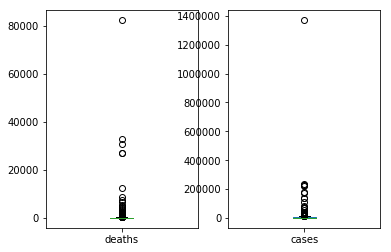

In [217]:
cols = ['deaths','cases']
todaysum_country[cols].plot(kind='box', subplots=True)

Sowohl Fallzahlen als auch Todesfälle enthalten starke Ausreißer nach oben, was bedeutet, dass es vor allem einige
wenige, stark betroffende Länder gibt. Dies zeigen ebenfalls die Maximalzahlen an.

Daher folgt nun eine Wertesortierung mit den Top10-Ländern der höchsten Fall- bzw. Todeszahlen:

In [218]:
today_cases = todaysum_country[['cases','deaths','popData2018']]
today_deaths = todaysum_country[['deaths','cases','popData2018']]


In [219]:
today_cases.sort_values(by=['cases'], ascending=False)[0:10]

,cases,deaths,popData2018
countriesAndTerritories,,,
United_States_of_America,1369964,82387,4.416760e+10
Russia,232243,2116,1.950454e+10
Spain,228030,26920,6.260982e+09
United_Kingdom,226463,32692,8.976014e+09
Italy,221216,30911,8.158223e+09
Brazil,177589,12400,2.827836e+10
Germany,171306,7634,1.119527e+10
Turkey,141475,3894,5.021503e+09
France,140227,26991,9.043278e+09


In [220]:
today_deaths.sort_values(by=['deaths'], ascending=False)[0:10]

,deaths,cases,popData2018
countriesAndTerritories,,,
United_States_of_America,82387,1369964,4.416760e+10
United_Kingdom,32692,226463,8.976014e+09
Italy,30911,221216,8.158223e+09
France,26991,140227,9.043278e+09
Spain,26920,228030,6.260982e+09
Brazil,12400,177589,2.827836e+10
Belgium,8761,53779,1.541979e+09
Germany,7634,171306,1.119527e+10
Iran,6733,110767,1.104304e+10


Text(0.5,1,'Deaths per Country')

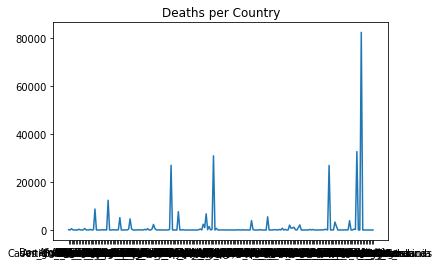

In [221]:
plt.plot(todaysum_country[['deaths']])
plt.title('Deaths per Country')

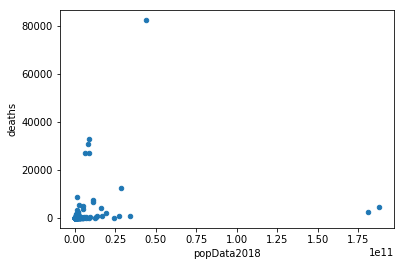

In [222]:
todaysum_country.plot(kind='scatter', y='deaths', x='popData2018')

Zu sehen ist hier, dass Fall- und Todeszahlen vor allem in großen Ländern besonders hoch sind. Wie wir vorhin
gesehen haben, korrelieren diese Zahlen aber nicht zwingend mit der Einwohnerzahl. Für einen besseren Überblick,
schauen wir uns daher noch die Top10 der Fallzahlen pro Einwohner an. 

In [223]:
todaysum_country['casesperpop'] = todaysum_country['cases']/todaysum_country['popData2018']
today_casesbypop = todaysum_country[['casesperpop','deaths','cases','popData2018']]
today_casesbypop.sort_values(by=['deaths'], ascending=False)[0:10]

,casesperpop,deaths,cases,popData2018
countriesAndTerritories,,,,
United_States_of_America,0.000031,82387,1369964,4.416760e+10
United_Kingdom,0.000025,32692,226463,8.976014e+09
Italy,0.000027,30911,221216,8.158223e+09
France,0.000016,26991,140227,9.043278e+09
Spain,0.000036,26920,228030,6.260982e+09
Brazil,0.000006,12400,177589,2.827836e+10
Belgium,0.000035,8761,53779,1.541979e+09
Germany,0.000015,7634,171306,1.119527e+10
Iran,0.000010,6733,110767,1.104304e+10


Unter den am stärksten betroffenden Ländern der Covid19-Krise pro Einwohnerzahl sind nach den USA vor allem viele
europäische Länder. Ob dies der Realität entspricht oder an mangelnder Intransparenz der Länder liegt, muss an anderer
Stelle geklärt werden.

## 3.2) Zeitreihenbetrachtung 

In [225]:
todaysum_date = data.groupby(['dateRep','countriesAndTerritories']).sum()
todaysum_month = data.groupby(['month','countriesAndTerritories']).sum()
todaysum_month.head()


day   year  cases  deaths   popData2018
month countriesAndTerritories                                         
1     Afghanistan              496  62620      0       0  1.152344e+09
      Algeria                  496  62620      0       0  1.309081e+09
      Armenia                  496  62620      0       0  9.150506e+07
      Australia                496  62620      7       0  7.747634e+08
      Austria                  496  62620      0       0  2.742581e+08